In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [ ]:
import pandas as pd 
data = pd.read_csv("housepricedata.csv") #load into dataframe
data.head() #check out top of dataframe

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
arr = data.values #turn into array

xvalues = arr[:,0:10]
yvalues = arr[:,10]

print(xvalues)

[[ 8450     7     5 ...     8     0   548]
 [ 9600     6     8 ...     6     1   460]
 [11250     7     5 ...     6     1   608]
 ...
 [ 9042     7     9 ...     9     2   252]
 [ 9717     5     6 ...     5     0   240]
 [ 9937     5     6 ...     6     0   276]]


In [ ]:
print(yvalues)

[1 1 1 ... 1 0 0]


In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
xvalues_scale = min_max_scaler.fit_transform(xvalues)

xvalues_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
from sklearn.model_selection import train_test_split
#splits data into train and (val and test) then splits val and tests apart
xvalues_train, xvalues_val_and_test, yvalues_train, yvalues_val_and_test = train_test_split(xvalues_scale, yvalues, test_size=0.3)
xvalues_val, xvalues_test, yvalues_val, yvalues_test = train_test_split(xvalues_val_and_test, yvalues_val_and_test, test_size=0.5)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [40]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [41]:
hist = model.fit(xvalues_train, yvalues_train,
          batch_size=32, epochs=100,
          validation_data=(xvalues_val, yvalues_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.0826 - accuracy: 0.8931 - val_loss: 0.0827 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.8960 - val_loss: 0.0826 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0730 - accuracy: 0.9144 - val_loss: 0.0825 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9073 - val_loss: 0.0825 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.8968 - val_loss: 0.0827 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.8947 - val_loss: 0.0825 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0811 - accuracy: 0.9035 - val_loss: 0.0824 - val_accuracy: 0.8676
Epoch 8/100
3

In [42]:

model.evaluate(xvalues_test, yvalues_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.8584


[0.09087448567152023, 0.8584474921226501]

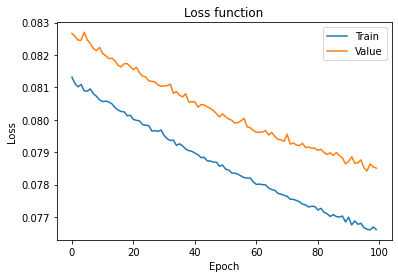

In [43]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Value'])
plt.show()

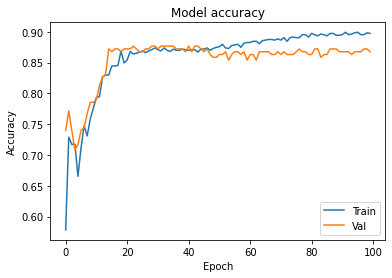

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#overfit model

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [44]:
model_2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
hist_2 = model_2.fit(xvalues_train, yvalues_train,
          batch_size=32, epochs=100,
          validation_data=(xvalues_val, yvalues_val))

Epoch 1/100
32/32 [==============================] - 2s 42ms/step - loss: 0.0357 - accuracy: 0.9468 - val_loss: 0.1134 - val_accuracy: 0.8630
Epoch 2/100
32/32 [==============================] - 1s 37ms/step - loss: 0.0298 - accuracy: 0.9636 - val_loss: 0.1002 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 1s 37ms/step - loss: 0.0239 - accuracy: 0.9675 - val_loss: 0.1030 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0295 - accuracy: 0.9596 - val_loss: 0.0954 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0417 - accuracy: 0.9458 - val_loss: 0.1072 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0346 - accuracy: 0.9497 - val_loss: 0.1190 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0381 - accuracy: 0.9559 - val_loss: 0.1115 - val_accuracy: 0.8676
Epoch 

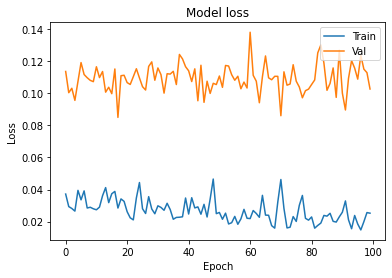

In [45]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

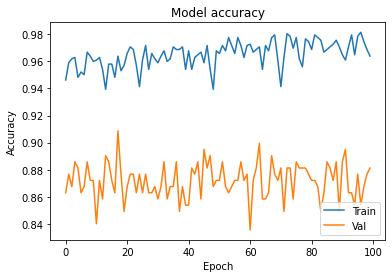

In [46]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [47]:
#Try to reduce overfitting 

from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [48]:
model_3.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
hist_3 = model_3.fit(xvalues_train, yvalues_train,
          batch_size=32, epochs=100,
          validation_data=(xvalues_val, yvalues_val))

Epoch 1/100
32/32 [==============================] - 3s 57ms/step - loss: 20.6294 - accuracy: 0.5524 - val_loss: 3.4527 - val_accuracy: 0.5662
Epoch 2/100
32/32 [==============================] - 2s 49ms/step - loss: 2.0886 - accuracy: 0.5355 - val_loss: 0.3562 - val_accuracy: 0.4932
Epoch 3/100
32/32 [==============================] - 2s 48ms/step - loss: 0.3028 - accuracy: 0.4810 - val_loss: 0.2529 - val_accuracy: 0.5068
Epoch 4/100
32/32 [==============================] - 2s 49ms/step - loss: 0.2518 - accuracy: 0.5108 - val_loss: 0.2502 - val_accuracy: 0.5068
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 0.2502 - accuracy: 0.4685 - val_loss: 0.2500 - val_accuracy: 0.5068
Epoch 6/100
32/32 [==============================] - 2s 53ms/step - loss: 0.2500 - accuracy: 0.4954 - val_loss: 0.2500 - val_accuracy: 0.5068
Epoch 7/100
32/32 [==============================] - 2s 49ms/step - loss: 0.2500 - accuracy: 0.5036 - val_loss: 0.2500 - val_accuracy: 0.5068
Epoch

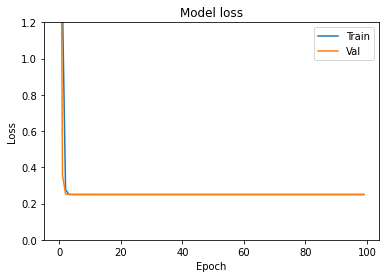

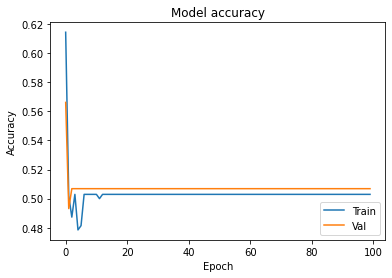

In [49]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()